In [3]:
import scipy.stats as stats

## One Sample Test

In [1]:
spending = [300, 450, 120, 769, 123, 783, 894, 450, 600, 700]

Average spending on Jumia is Ksh 450

Null Hypothesis: Average spending on jumia is equal to 450.

Alternate Hypothesis: Average spending on jumia is not equal to 450 

$H_O: \mu = 450 $

$H_A: \mu \neq 450 $

In [3]:
# performing a one sample t-test
def one_sample_ttest(data, population_mean):
    results = stats.ttest_1samp(a=data, popmean=population_mean)

    return results

In [4]:
one_sample_ttest(spending, 450)

Ttest_1sampResult(statistic=0.7893897539068457, pvalue=0.45017923667544657)

## Two Sample Test

In [9]:
elec_spending = [300, 450, 120, 769, 123, 783, 894, 450, 600, 700]

beauty_spending = [127, 890, 670, 563, 876, 520, 125, 50, 300, 250]

$H_O: \mu{elec} = \mu{bea} $ (Average electronic spending is equal to average beauty products spending)

$H_A: \mu{elec} \neq \mu{bea} $ (Average electronic spending is not equal to average beauty products spending)

In [10]:
def two_sample_test(sample_1, sample_2):
    results = stats.ttest_ind(a = sample_1, b = sample_2)

    return results


two_sample_test(elec_spending, beauty_spending)

Ttest_indResult(statistic=0.6217985201241449, pvalue=0.5418706234814599)

* Since the ```P_value 0.542``` is greater than 0.05, we fail to reject the null hypothesis.
* There is sufficient evidence to conclude that the average spending on electronics is equal to average spending on beauty products.

## Paired Samples t-test

In [1]:
results_before = [2, 5, 3, 4, 1, 5, 7, 5, 6, 4]

results_after = [7, 9, 8, 6, 9, 6, 8, 9, 8, 9]

$H_O: \mu{before} = \mu{after} $ (Average score before and After Tution is equal)

$H_A: \mu{before} \neq \mu{after} $ (Average score before before and after Tution is not equal)

In [7]:
def paired_test(before, after, alternative):
    """A function to test hpothesis between two related scores."""
    results = stats.ttest_rel(a=before, b=after, alternative=alternative)

    return results


paired_test(results_before, results_after, "two-sided")

Ttest_relResult(statistic=-5.285714285714286, pvalue=0.000503279857416423)

* Since the ```p_value 0.0005``` is less that $\alpha$ ```0.05```, we reject the null Hypothesis.

* There is suffient evidence that the tuition was effective.
* The alternative defines the alternative hypothesis. The following options are available **(default is ‘two-sided’)**:

>>>>**‘two-sided’**: the means of the distributions underlying the samples are unequal.

>>>>**‘less’**: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.

>>>>**‘greater’**: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

Read more [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html). 

## Implementation on Titanic Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("../train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

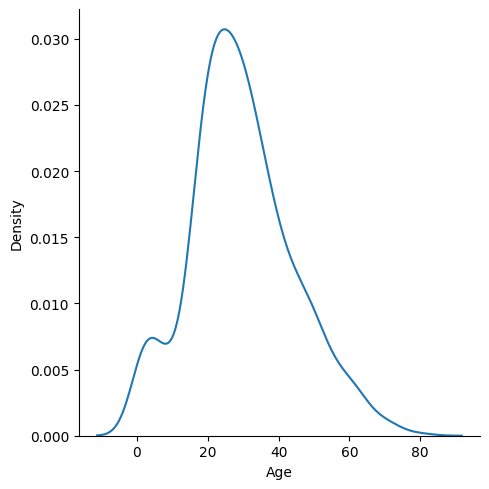

In [26]:
age = df[df['Age'].notna()].Age

sns.displot(age, kind="kde")

In [28]:
survive = df[df["Survived"] == 1]
survive[survive["Age"].notnull()]
survive.reset_index(inplace = True)

In [30]:
survive.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


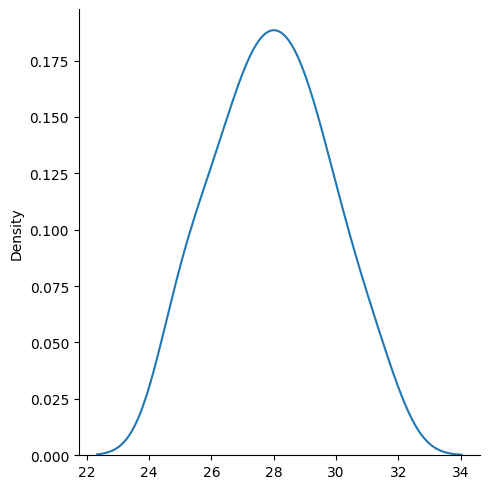

In [45]:
survive_sample = []

for people in range(50):
    values = np.random.choice(survive[survive["Age"].notnull()].Age, 50).mean()
    survive_sample.append(values)

sns.displot(survive_sample, kind="kde")

* Claim that the average age of passengers who survived is greater than 28

$H_0: \mu <= 28 $

$H_A: \mu > 28 $

In [46]:
from statsmodels.stats.weightstats import ztest, zconfint

# calculation
z_score, p_value = ztest(survive_sample, value = 28, alternative = 'larger')

In [47]:
# display z_score and p_value
print(f"p_value: {p_value} \nz_score: {z_score}")

p_value: 0.5686536601781663 
z_score: -0.1729475189883627


In [48]:
if (p_value < 0.05):
    print(f"Reject null hypothesis with {100-(p_value*100)}% confidence level")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis
